## Problem Statement

https://github.com/lucky630/ML-Challenges/blob/master/Wns/kernel.ipynb

Your client is a large MNC and they have 9 broad verticals across the organisation. One of the problem your client is facing is around identifying the right people for promotion (only for manager position and below) and prepare them in time. Currently the process, they are following is

- They first identify a set of employees based on recommendations/ past performance
- Selected employees go through the separate training and evaluation program for each vertical. These programs are based on the required skill of each vertical
- At the end of the program, based on various factors such as training performance, KPI completion (only employees with KPIs completed greater than 60% are considered) etc., employee gets promotioin

## Importing Library

Step 1: Importing the Relevant Libraries

Step 2: Data Inspection

Step 3: Data Cleaning

Step 4: Exploratory Data Analysis

Step 5: Building Model

## Importing Library

In [1]:
import pyforest

from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler

from sklearn.model_selection import train_test_split

from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC

from sklearn.metrics import confusion_matrix

In [2]:
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

## Customising Visulization 

In [3]:
sns.set(rc={'figure.figsize':(8,5)})

<IPython.core.display.Javascript object>

## Data Reading

In [4]:
df_train = pd.read_csv('train_LZdllcl.csv')
df_test = pd.read_csv('test_2umaH9m.csv')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [5]:
df_train.head()

,employee_id,department,region,education,gender,recruitment_channel,no_of_trainings,age,previous_year_rating,length_of_service,KPIs_met >80%,awards_won?,avg_training_score,is_promoted
0,65438,Sales & Marketing,region_7,Master's & above,f,sourcing,1,35,5.0,8,1,0,49,0
1,65141,Operations,region_22,Bachelor's,m,other,1,30,5.0,4,0,0,60,0
2,7513,Sales & Marketing,region_19,Bachelor's,m,sourcing,1,34,3.0,7,0,0,50,0
3,2542,Sales & Marketing,region_23,Bachelor's,m,other,2,39,1.0,10,0,0,50,0
4,48945,Technology,region_26,Bachelor's,m,other,1,45,3.0,2,0,0,73,0


In [6]:
df_test.head()

,employee_id,department,region,education,gender,recruitment_channel,no_of_trainings,age,previous_year_rating,length_of_service,KPIs_met >80%,awards_won?,avg_training_score
0,8724,Technology,region_26,Bachelor's,m,sourcing,1,24,NaN,1,1,0,77
1,74430,HR,region_4,Bachelor's,f,other,1,31,3.0,5,0,0,51
2,72255,Sales & Marketing,region_13,Bachelor's,m,other,1,31,1.0,4,0,0,47
3,38562,Procurement,region_2,Bachelor's,f,other,3,31,2.0,9,0,0,65
4,64486,Finance,region_29,Bachelor's,m,sourcing,1,30,4.0,7,0,0,61


## Data Inspection

In [7]:
df_train.describe().T

,count,mean,std,min,25%,50%,75%,max
employee_id,54808.0,39195.830627,22586.581449,1.0,19669.75,39225.5,58730.5,78298.0
no_of_trainings,54808.0,1.253011,0.609264,1.0,1.00,1.0,1.0,10.0
age,54808.0,34.803915,7.660169,20.0,29.00,33.0,39.0,60.0
previous_year_rating,50684.0,3.329256,1.259993,1.0,3.00,3.0,4.0,5.0
length_of_service,54808.0,5.865512,4.265094,1.0,3.00,5.0,7.0,37.0
KPIs_met >80%,54808.0,0.351974,0.477590,0.0,0.00,0.0,1.0,1.0
awards_won?,54808.0,0.023172,0.150450,0.0,0.00,0.0,0.0,1.0
avg_training_score,54808.0,63.386750,13.371559,39.0,51.00,60.0,76.0,99.0
is_promoted,54808.0,0.085170,0.279137,0.0,0.00,0.0,0.0,1.0


In [8]:
df_test.describe().T

,count,mean,std,min,25%,50%,75%,max
employee_id,23490.0,39041.399149,22640.809201,3.0,19370.25,38963.5,58690.0,78295.0
no_of_trainings,23490.0,1.254236,0.600910,1.0,1.00,1.0,1.0,9.0
age,23490.0,34.782929,7.679492,20.0,29.00,33.0,39.0,60.0
previous_year_rating,21678.0,3.339146,1.263294,1.0,3.00,3.0,4.0,5.0
length_of_service,23490.0,5.810387,4.207917,1.0,3.00,5.0,7.0,34.0
KPIs_met >80%,23490.0,0.358834,0.479668,0.0,0.00,0.0,1.0,1.0
awards_won?,23490.0,0.022776,0.149191,0.0,0.00,0.0,0.0,1.0
avg_training_score,23490.0,63.263133,13.411750,39.0,51.00,60.0,76.0,99.0


In [9]:
df_train.dtypes
df_test.dtypes

employee_id               int64
department               object
region                   object
education                object
gender                   object
recruitment_channel      object
no_of_trainings           int64
age                       int64
previous_year_rating    float64
length_of_service         int64
KPIs_met >80%             int64
awards_won?               int64
avg_training_score        int64
is_promoted               int64
dtype: object

employee_id               int64
department               object
region                   object
education                object
gender                   object
recruitment_channel      object
no_of_trainings           int64
age                       int64
previous_year_rating    float64
length_of_service         int64
KPIs_met >80%             int64
awards_won?               int64
avg_training_score        int64
dtype: object

## Data Cleaning

In [10]:
df_train.isnull().sum()

employee_id                0
department                 0
region                     0
education               2409
gender                     0
recruitment_channel        0
no_of_trainings            0
age                        0
previous_year_rating    4124
length_of_service          0
KPIs_met >80%              0
awards_won?                0
avg_training_score         0
is_promoted                0
dtype: int64

In [11]:
df_test.isnull().sum()

employee_id                0
department                 0
region                     0
education               1034
gender                     0
recruitment_channel        0
no_of_trainings            0
age                        0
previous_year_rating    1812
length_of_service          0
KPIs_met >80%              0
awards_won?                0
avg_training_score         0
dtype: int64

In [12]:
df_train['education'].unique()
df_test['education'].unique()

array(["Master's & above", "Bachelor's", nan, 'Below Secondary'],
      dtype=object)

array(["Bachelor's", "Master's & above", nan, 'Below Secondary'],
      dtype=object)

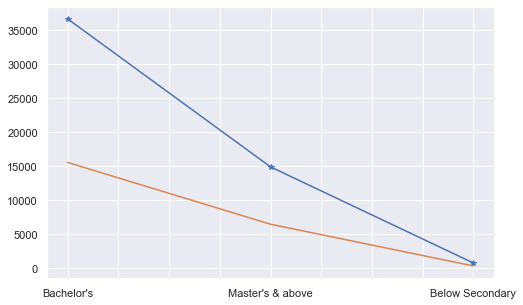

In [13]:
df_train['education'].value_counts().plot(marker='*')
df_test['education'].value_counts().plot()

In [14]:
df_train['previous_year_rating'].value_counts()
df_test['previous_year_rating'].value_counts()

3.0    18618
5.0    11741
4.0     9877
1.0     6223
2.0     4225
Name: previous_year_rating, dtype: int64

3.0    7921
5.0    5097
4.0    4249
1.0    2680
2.0    1731
Name: previous_year_rating, dtype: int64

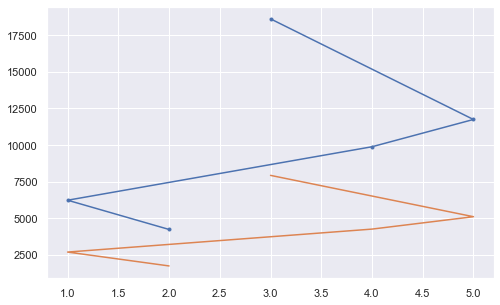

In [15]:
df_train['previous_year_rating'].value_counts().plot(marker='.')
df_test['previous_year_rating'].value_counts().plot()

## Missing Value Treatment

In [16]:
df_train['education'].replace(np.nan, "Bachelor's", inplace=True)
df_test['education'].replace(np.nan, "Bachelor's", inplace=True)

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [17]:
df_train['previous_year_rating'].mode()
df_test['previous_year_rating'].mode()

0    3.0
dtype: float64

0    3.0
dtype: float64

In [18]:
df_train['previous_year_rating'].replace(np.nan, 3.0, inplace=True)
df_test['previous_year_rating'].replace(np.nan, 3.0, inplace=True)

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [19]:
df_train.isnull().sum()
print('test')
df_test.isnull().sum()

employee_id             0
department              0
region                  0
education               0
gender                  0
recruitment_channel     0
no_of_trainings         0
age                     0
previous_year_rating    0
length_of_service       0
KPIs_met >80%           0
awards_won?             0
avg_training_score      0
is_promoted             0
dtype: int64

test


employee_id             0
department              0
region                  0
education               0
gender                  0
recruitment_channel     0
no_of_trainings         0
age                     0
previous_year_rating    0
length_of_service       0
KPIs_met >80%           0
awards_won?             0
avg_training_score      0
dtype: int64

## Label Encoder

In [20]:
label = LabelEncoder()

df_train['department'] = label.fit_transform(df_train['department'])
df_test['department'] = label.transform(df_test['department'])
df_train['region'] = label.fit_transform(df_train['region'])
df_test['region'] = label.transform(df_test['region'])
df_train['education'] = label.fit_transform(df_train['education'])
df_test['education'] = label.transform(df_test['education'])
df_train['gender'] = label.fit_transform(df_train['gender'])
df_test['gender'] = label.transform(df_test['gender'])

df_train['recruitment_channel'] = label.fit_transform(df_train['recruitment_channel'])
df_test['recruitment_channel'] = label.transform(df_test['recruitment_channel'])

In [21]:
df_train
df_test

,employee_id,department,region,education,gender,recruitment_channel,no_of_trainings,age,previous_year_rating,length_of_service,KPIs_met >80%,awards_won?,avg_training_score,is_promoted
0,65438,7,31,2,0,2,1,35,5.0,8,1,0,49,0
1,65141,4,14,0,1,0,1,30,5.0,4,0,0,60,0
2,7513,7,10,0,1,2,1,34,3.0,7,0,0,50,0
3,2542,7,15,0,1,0,2,39,1.0,10,0,0,50,0
4,48945,8,18,0,1,0,1,45,3.0,2,0,0,73,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
54803,3030,8,5,0,1,2,1,48,3.0,17,0,0,78,0
54804,74592,4,19,2,0,0,1,37,2.0,6,0,0,56,0
54805,13918,0,0,0,1,0,1,27,5.0,3,1,0,79,0
54806,13614,7,33,0,1,2,1,29,1.0,2,0,0,45,0


,employee_id,department,region,education,gender,recruitment_channel,no_of_trainings,age,previous_year_rating,length_of_service,KPIs_met >80%,awards_won?,avg_training_score
0,8724,8,18,0,1,2,1,24,3.0,1,1,0,77
1,74430,2,28,0,0,0,1,31,3.0,5,0,0,51
2,72255,7,4,0,1,0,1,31,1.0,4,0,0,47
3,38562,5,11,0,0,0,3,31,2.0,9,0,0,65
4,64486,1,21,0,1,2,1,30,4.0,7,0,0,61
...,...,...,...,...,...,...,...,...,...,...,...,...,...
23485,53478,3,11,1,1,2,1,24,3.0,1,0,0,61
23486,25600,8,17,0,1,2,1,31,3.0,7,0,0,74
23487,45409,2,7,0,0,2,1,26,4.0,4,0,0,50
23488,1186,5,24,0,1,2,3,27,3.0,1,0,0,70


## Data Split

In [22]:
# train data
y = df_train['is_promoted']
X = df_train.drop(['employee_id', 'recruitment_channel','is_promoted'], axis=1)
df_test_id = df_test['employee_id']

In [23]:
X

,department,region,education,gender,no_of_trainings,age,previous_year_rating,length_of_service,KPIs_met >80%,awards_won?,avg_training_score
0,7,31,2,0,1,35,5.0,8,1,0,49
1,4,14,0,1,1,30,5.0,4,0,0,60
2,7,10,0,1,1,34,3.0,7,0,0,50
3,7,15,0,1,2,39,1.0,10,0,0,50
4,8,18,0,1,1,45,3.0,2,0,0,73
...,...,...,...,...,...,...,...,...,...,...,...
54803,8,5,0,1,1,48,3.0,17,0,0,78
54804,4,19,2,0,1,37,2.0,6,0,0,56
54805,0,0,0,1,1,27,5.0,3,1,0,79
54806,7,33,0,1,1,29,1.0,2,0,0,45


In [24]:
y

0        0
1        0
2        0
3        0
4        0
        ..
54803    0
54804    0
54805    0
54806    0
54807    0
Name: is_promoted, Length: 54808, dtype: int64

In [25]:
scaler = StandardScaler()
X_sta = scaler.fit_transform(X)

In [26]:
X_sta

array([[ 0.80893285,  1.77652645,  1.61975831, ...,  1.35687789,
        -0.15401776, -1.07593145],
       [-0.38818322, -0.16303375, -0.62883817, ..., -0.73698599,
        -0.15401776, -0.25328242],
       [ 0.80893285, -0.61940086, -0.62883817, ..., -0.73698599,
        -0.15401776, -1.00114517],
       ...,
       [-1.98433798, -1.76031862, -0.62883817, ...,  1.35687789,
        -0.15401776,  1.1676568 ],
       [ 0.80893285,  2.00471   , -0.62883817, ..., -0.73698599,
        -0.15401776, -1.37507655],
       [-1.1862606 , -0.16303375, -0.62883817, ..., -0.73698599,
        -0.15401776, -1.07593145]])

In [27]:
X_train, X_test, y_train, y_test = train_test_split(X_sta, y, test_size=0.2, random_state=0)

In [28]:
log_model = LogisticRegression()
log_model.fit(X_train, y_train)
log_model.score(X_train, y_train)
log_pred=log_model.predict(X_test)
c_matrix = confusion_matrix(log_pred, y_test)
c_matrix

LogisticRegression()

0.916708479678876

array([[9998,  843],
       [  43,   78]], dtype=int64)

In [29]:
def pred_summary(class_model):
    print('******************************************************************************************************')
    model = class_model.fit(X_train, y_train)
    print(f'{class_model}')
    print('training score ---->', model.score(X_train, y_train))
    y_pred = model.predict(X_test)
    print('Prediction of model are --->', y_pred)
    c_matrix = confusion_matrix(y_pred, y_test)
    print('confusion matrix of y_pred and y_test \n', c_matrix)
    print('******************************************************************************************************')
    print('\n')
    print('\n')

In [30]:
classifier = [LogisticRegression(), DecisionTreeClassifier(), SVC()]

In [31]:
for i in classifier:
    pred_summary(i)

******************************************************************************************************
LogisticRegression()
training score ----> 0.916708479678876
Prediction of model are ---> [0 0 0 ... 0 0 0]
confusion matrix of y_pred and y_test 
 [[9998  843]
 [  43   78]]
******************************************************************************************************




******************************************************************************************************
DecisionTreeClassifier()
training score ----> 0.9994070154632122
Prediction of model are ---> [0 0 1 ... 0 0 0]
confusion matrix of y_pred and y_test 
 [[9465  508]
 [ 576  413]]
******************************************************************************************************




******************************************************************************************************
SVC()
training score ----> 0.9240751721935866
Prediction of model are ---> [0 0 0 ... 0 0 0]
confusion matrix of y_pred and 